<a href="https://colab.research.google.com/github/bintangnabiil/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/main/Rangkuman_Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 3: Classification
Chapter 3 membahas tentang algoritma klasifikasi dalam machine learning, dengan fokus utama pada binary classification dan multiclass classification. Chapter ini menggunakan dataset MNIST sebagai studi kasus utama untuk mendemonstrasikan berbagai teknik klasifikasi.

##1. MNIST Dataset
- Dataset yang berisi 70,000 gambar digit tulisan tangan (0-9)
- Setiap gambar berukuran 28x28 pixels (784 features)
- 60,000 gambar untuk training, 10,000 untuk testing
- Dataset sudah ter-shuffle dan ter-split dengan baik

##2. Binary Classification

Konsep Teoritis:
Binary classification adalah tugas machine learning untuk mengklasifikasikan data ke dalam dua kategori. Dalam konteks ini, kita akan membuat classifier untuk mendeteksi apakah sebuah digit adalah angka 5 atau bukan (5-detector).

Algoritma yang dibahas:

- Stochastic Gradient Descent (SGD) Classifier: Algoritma yang efisien untuk dataset besar, menggunakan gradient descent untuk optimasi
- Support Vector Machine (SVM): Mencari hyperplane optimal yang memisahkan kelas dengan margin maksimal
- Random Forest: Ensemble method yang menggunakan multiple decision trees

##3. Performance Measures
###3.1 Cross-Validation
Cross-validation adalah teknik untuk mengevaluasi performa model dengan membagi data training menjadi beberapa fold, melatih model pada sebagian fold, dan menguji pada fold sisanya.

###3.2 Confusion Matrix
Matrix yang menunjukkan hubungan antara prediksi dan actual values:

- True Positive (TP): Prediksi positif yang benar
- False Positive (FP): Prediksi positif yang salah
- True Negative (TN): Prediksi negatif yang benar
- False Negative (FN): Prediksi negatif yang salah

###3.3 Precision dan Recall

- Precision: TP / (TP + FP) - Seberapa akurat prediksi positif
- Recall (Sensitivity): TP / (TP + FN) - Seberapa banyak actual positives yang terdeteksi
- F1 Score: 2 × (precision × recall) / (precision + recall) - Harmonic mean dari precision dan recall

###3.4 ROC Curve dan AUC
- ROC Curve: Plot True Positive Rate vs False Positive Rate
- AUC: Area Under the ROC Curve - Mengukur kemampuan classifier membedakan kelas

##4. Multiclass Classification

Konsep Teoritis:
Multiclass classification adalah tugas mengklasifikasikan data ke dalam lebih dari dua kategori. Ada beberapa strategi:

- One-vs-Rest (OvR): Melatih satu binary classifier untuk setiap kelas
- One-vs-One (OvO): Melatih binary classifier untuk setiap pasangan kelas
- Multiclass algorithms: Algoritma yang secara natural mendukung multiclass (Random Forest, Naive Bayes)

##5. Error Analysis

Teknik untuk menganalisis kesalahan yang dibuat model:

- Confusion matrix untuk multiclass
- Analisis individual errors
- Plotting error examples untuk visual inspection

##6. Multilabel Classification

Klasifikasi dimana setiap instance dapat memiliki multiple labels. Contoh: foto yang berisi orang dan mobil sekaligus.

##7. Multioutput Classification

Kombinasi multilabel dan multiclass classification, dimana setiap label dapat memiliki multiple values.


#Contoh Kodingan

##1. Loading dan Exploring MNIST Dataset

Dataset shape: (70000, 784)
Labels shape: (70000,)


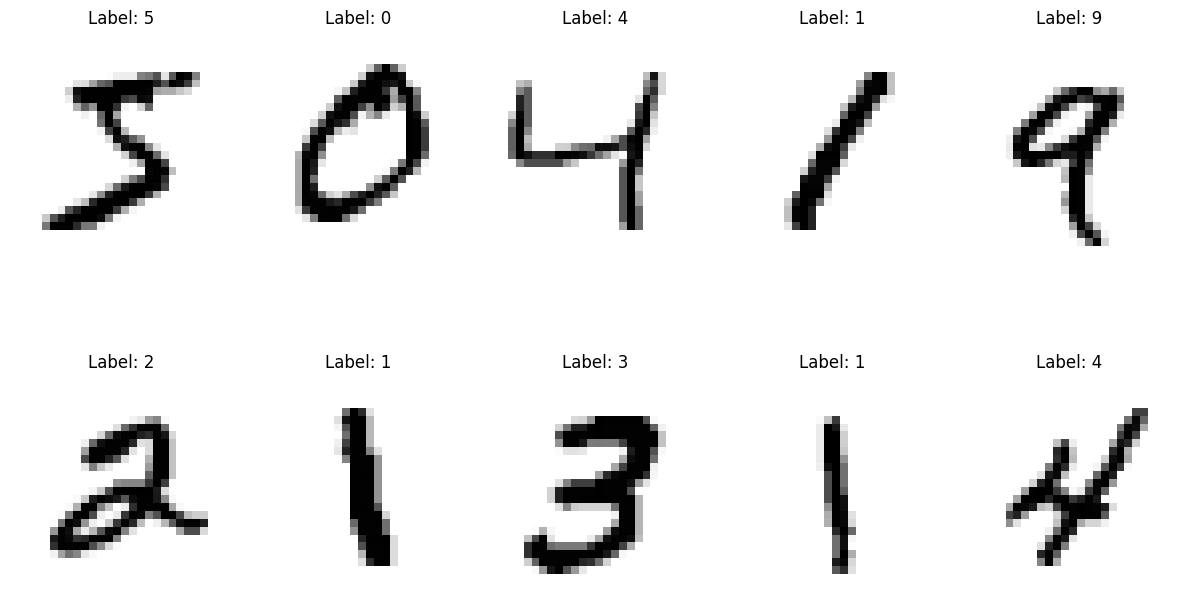

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Convert labels to integers
y = y.astype(np.uint8)

# Split data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Visualize some digits
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plot_digit(X_train[i])
    plt.title(f"Label: {y_train[i]}")
plt.tight_layout()
plt.show()

##2. Binary Classification - 5-Detector

In [2]:
# Create binary classification problem (5 vs not-5)
y_train_5 = (y_train == 5)  # True for 5, False for other digits
y_test_5 = (y_test == 5)

# Train SGD Classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Make prediction
some_digit = X_train[0]
prediction = sgd_clf.predict([some_digit])
print(f"Prediction for first digit: {prediction}")
print(f"Actual label: {y_train_5[0]}")

Prediction for first digit: [ True]
Actual label: True


##3. Cross-Validation

In [3]:
# Cross-validation with accuracy
cv_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

# Dummy classifier for comparison
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_scores = cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"Dummy classifier scores: {dummy_scores}")

Cross-validation scores: [0.95035 0.96035 0.9604 ]
Mean CV score: 0.9570
Dummy classifier scores: [0.90965 0.90965 0.90965]


##4. Confusion Matrix dan Metrics

Confusion Matrix:
[[53892   687]
 [ 1891  3530]]
Precision: 0.8371
Recall: 0.6512
F1 Score: 0.7325


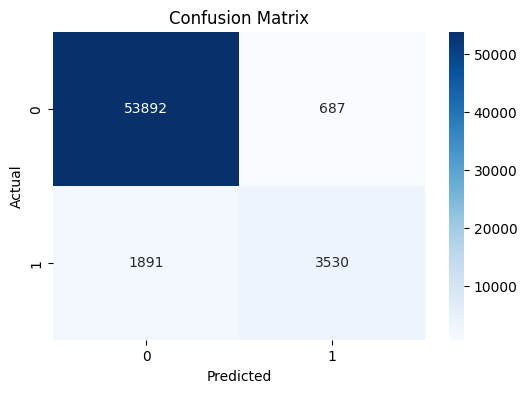

In [4]:
# Get predictions using cross-validation
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# Confusion Matrix
cm = confusion_matrix(y_train_5, y_train_pred)
print("Confusion Matrix:")
print(cm)

# Calculate metrics
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Visualize confusion matrix
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##5. Precision-Recall Curve

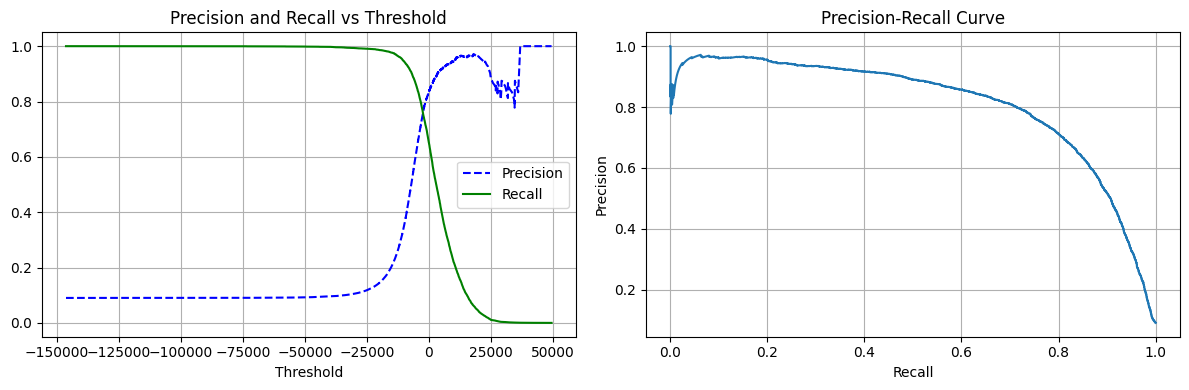

In [5]:
# Get decision scores
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Plot PR curve
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision and Recall vs Threshold")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)

plt.tight_layout()
plt.show()

##6. ROC Curve

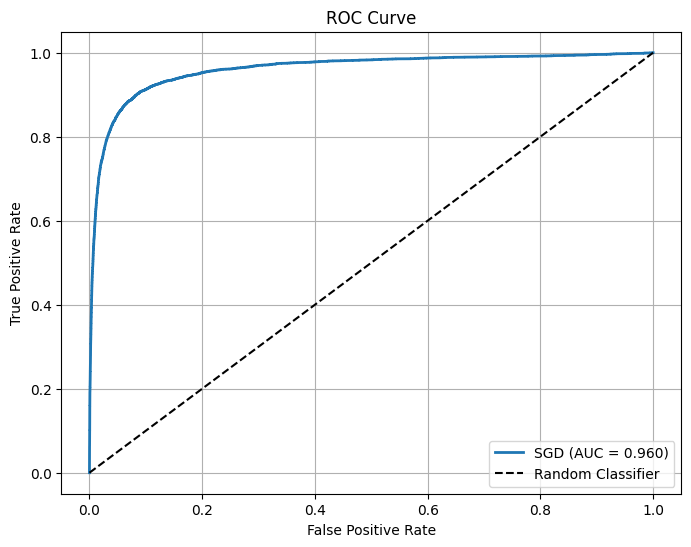

ROC AUC Score: 0.9605


In [6]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
roc_auc = roc_auc_score(y_train_5, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'SGD (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")

##7. Comparing Different Classifiers

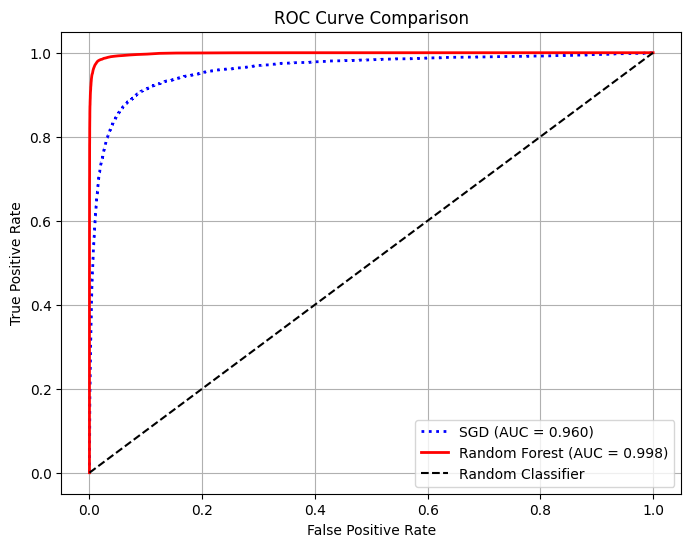

In [7]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(rf_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]  # Get positive class probabilities

# Compare ROC curves
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
roc_auc_forest = roc_auc_score(y_train_5, y_scores_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label=f'SGD (AUC = {roc_auc:.3f})')
plt.plot(fpr_forest, tpr_forest, "r-", linewidth=2, label=f'Random Forest (AUC = {roc_auc_forest:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

##8. Multiclass Classification

In [8]:
# Train multiclass classifier
sgd_clf_multiclass = SGDClassifier(random_state=42)
sgd_clf_multiclass.fit(X_train, y_train)

# Make predictions
some_digit_pred = sgd_clf_multiclass.predict([some_digit])
print(f"Multiclass prediction: {some_digit_pred}")

# Get decision scores for all classes
decision_scores = sgd_clf_multiclass.decision_function([some_digit])
print(f"Decision scores: {decision_scores}")
print(f"Highest score class: {np.argmax(decision_scores)}")

# Cross-validation for multiclass
multiclass_scores = cross_val_score(sgd_clf_multiclass, X_train, y_train, cv=3, scoring="accuracy")
print(f"Multiclass CV scores: {multiclass_scores}")
print(f"Mean accuracy: {multiclass_scores.mean():.4f}")

Multiclass prediction: [3]
Decision scores: [[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]
Highest score class: 3
Multiclass CV scores: [0.87365 0.85835 0.8689 ]
Mean accuracy: 0.8670


##9. Error Analysis

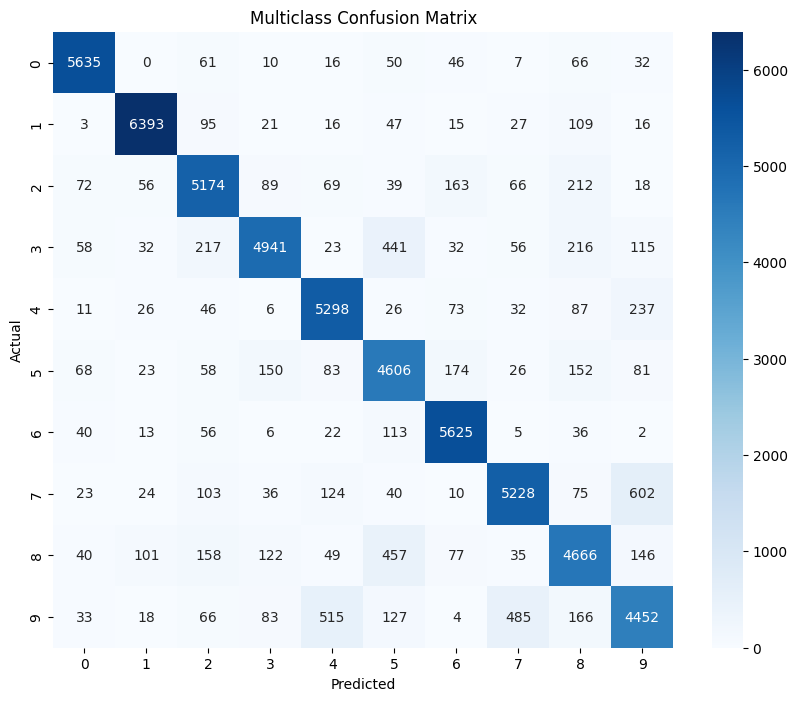

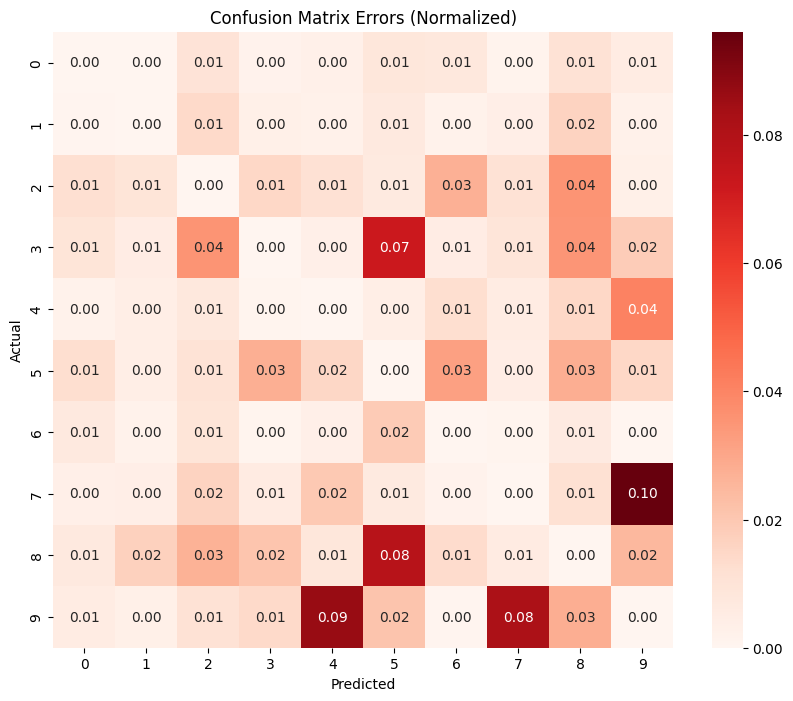

In [9]:
# Get predictions and confusion matrix for multiclass
y_train_pred_multiclass = cross_val_predict(sgd_clf_multiclass, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred_multiclass)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mx, annot=True, fmt='d', cmap='Blues')
plt.title('Multiclass Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Normalize confusion matrix
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Fill diagonal with zeros to highlight errors
np.fill_diagonal(norm_conf_mx, 0)

plt.figure(figsize=(10, 8))
sns.heatmap(norm_conf_mx, annot=True, fmt='.2f', cmap='Reds')
plt.title('Confusion Matrix Errors (Normalized)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##10. Analyzing Individual Errors

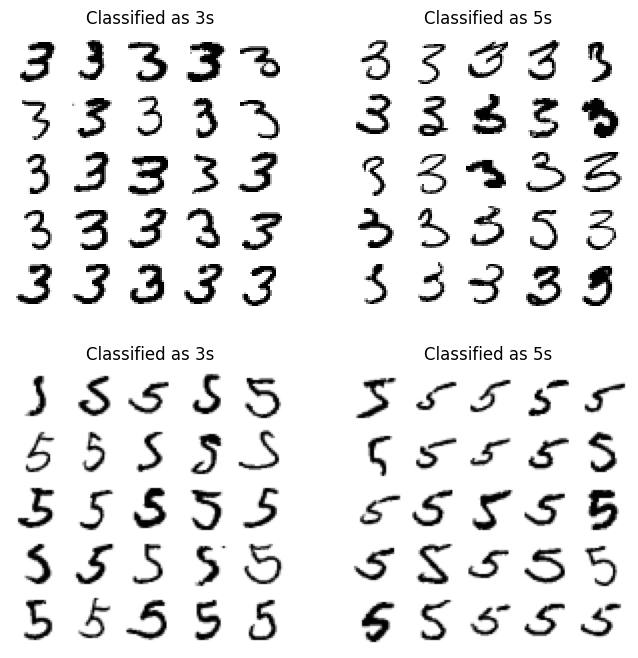

In [10]:
# Find some error examples
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.extend([np.zeros((size, size))] * n_empty)
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

# Find misclassified 3s and 5s
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred_multiclass == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred_multiclass == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred_multiclass == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred_multiclass == cl_b)]

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.title("Classified as 3s")
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.title("Classified as 5s")
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.title("Classified as 3s")
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.title("Classified as 5s")
plt.show()